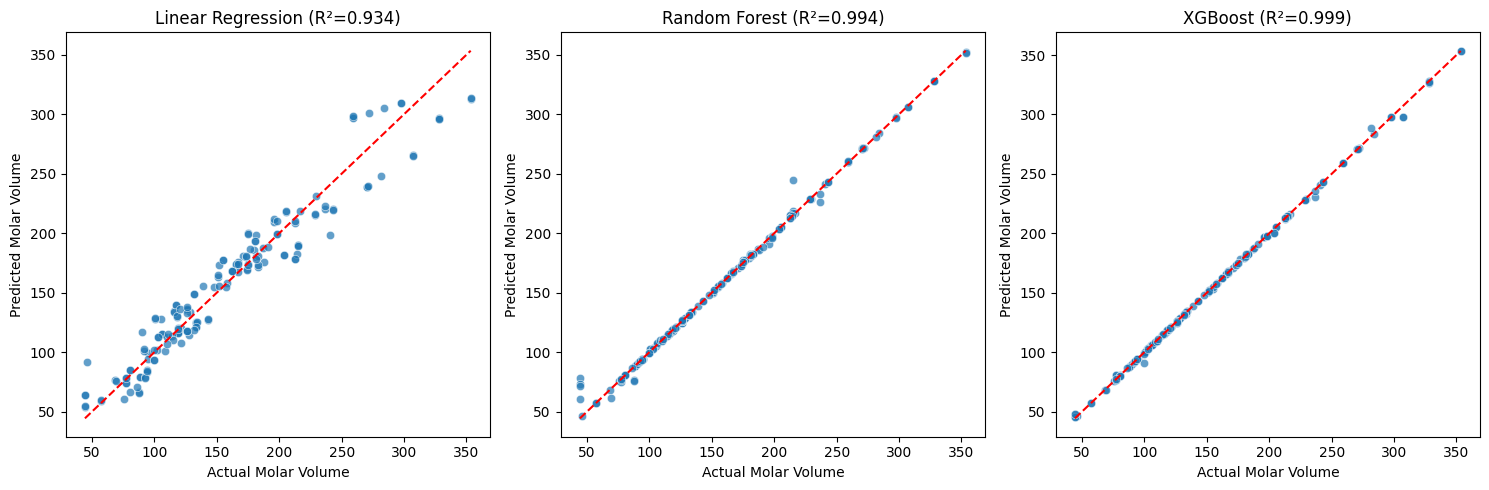

<ipython-input-1-b5a7f3249ef4>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["R2 Score"], palette="coolwarm")


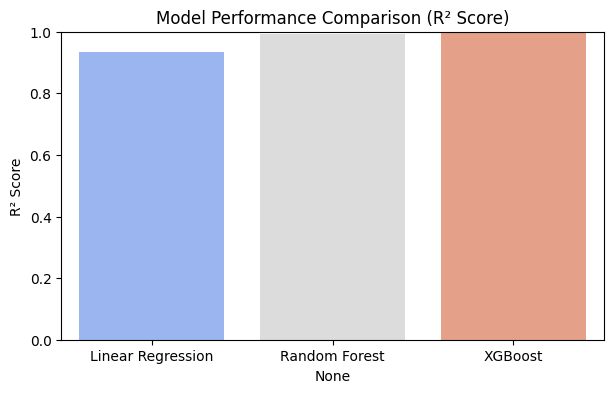

,R2 Score,MAE
Linear Regression,0.934162,13.524594
Random Forest,0.994129,1.621214
XGBoost,0.999446,0.595823


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Load dataset
file_path = "/content/Molarv.csv"
df = pd.read_csv(file_path)

# Trim column names to remove extra spaces
df.columns = df.columns.str.strip()

# Define features and target
X = df.drop(columns=["Molar Volume"])
y = df["Molar Volume"]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
plt.figure(figsize=(15, 5))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {"R2 Score": r2, "MAE": mae}

    # Scatter plot: Actual vs. Predicted
    plt.subplot(1, 3, i)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Molar Volume")
    plt.ylabel("Predicted Molar Volume")
    plt.title(f"{name} (R²={r2:.3f})")

plt.tight_layout()
plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Bar plot of R² scores
plt.figure(figsize=(7, 4))
sns.barplot(x=results_df.index, y=results_df["R2 Score"], palette="coolwarm")
plt.ylabel("R² Score")
plt.title("Model Performance Comparison (R² Score)")
plt.ylim(0, 1)
plt.show()

# Display results
display(results_df)


                   R² Score        MAE          MSE       RMSE
Linear Regression  0.934162  13.524594   300.847160  17.344946
Ridge Regression   0.919215  14.729039   369.150456  19.213289
Lasso Regression   0.889696  15.569900   504.038327  22.450798
Decision Tree      0.994723   0.686027    24.114951   4.910698
Random Forest      0.993403   1.651816    30.145860   5.490525
Gradient Boosting  0.994481   3.398291    25.218112   5.021764
Extra Trees        0.999895   0.174577     0.478169   0.691497
SVR                0.418983  33.017797  2654.972145  51.526422
KNN                0.973313   7.913378   121.946458  11.042937
XGBoost            0.999477   0.593338     2.391538   1.546460


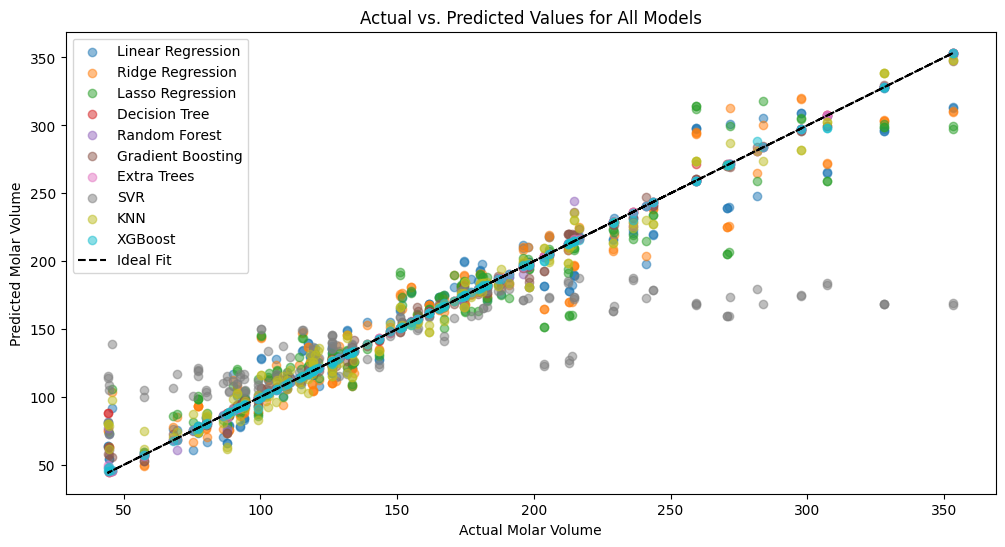

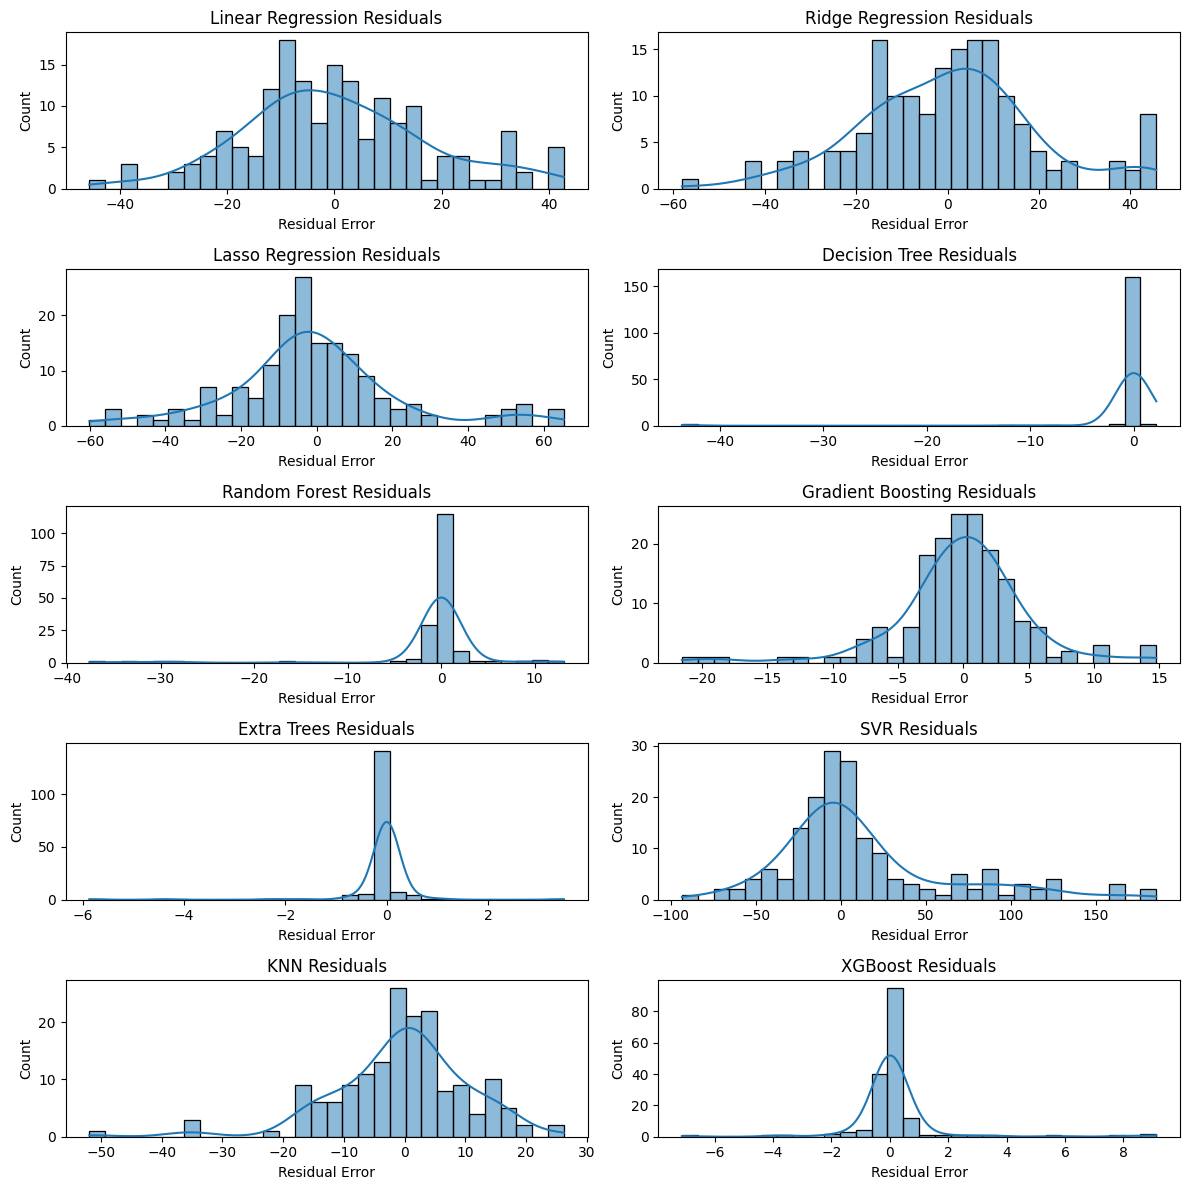

<ipython-input-2-774baec55c8f>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["R² Score"], palette="coolwarm")


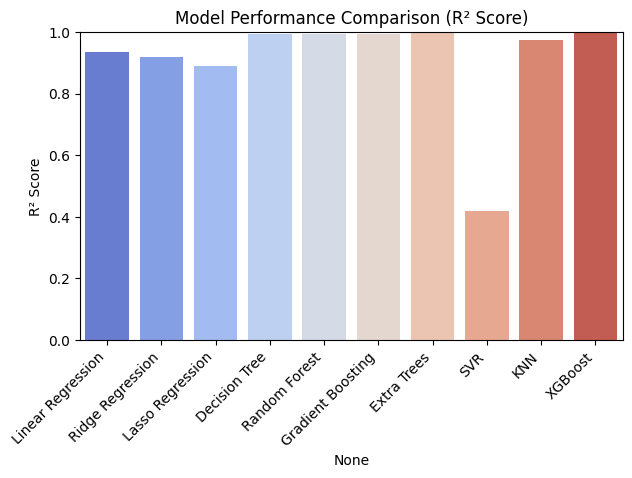

Best Model: Extra Trees
        Actual   Predicted
695  259.24780  259.247800
816  229.13920  229.139200
30    57.31999   56.807098
599   94.51571   94.515710
96   196.08780  195.867344
244  179.43280  179.432800
558  297.64680  297.646800
352  119.10530  119.105300
464  121.24310  121.462879
543  105.53700  105.537000
447   68.00980   68.009800
254  151.00770  151.007700
250  328.12570  328.125700
65    77.23524   77.235240
668  170.94770  170.947700
215  165.32570  165.372061
39    94.51571   94.493484
192   80.66261   80.662610
86   155.24390  154.730227
493  166.40780  166.348233


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv("Molarv.csv")

# Trim column names to remove extra spaces
df.columns = df.columns.str.strip()

# Define features and target
X = df.drop(columns=["Molar Volume"])
y = df["Molar Volume"]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    results[name] = {"R² Score": r2, "MAE": mae, "MSE": mse, "RMSE": rmse}
    predictions[name] = y_pred

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(12, 6))
for name, y_pred in predictions.items():
    plt.scatter(y_test, y_pred, label=name, alpha=0.5)
plt.plot(y_test, y_test, color="black", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Molar Volume")
plt.ylabel("Predicted Molar Volume")
plt.title("Actual vs. Predicted Values for All Models")
plt.legend()
plt.show()

# Residual error distribution for each model
fig, axes = plt.subplots(5, 2, figsize=(12, 12))
axes = axes.flatten()

for i, (name, y_pred) in enumerate(predictions.items()):
    residuals = y_test - y_pred
    sns.histplot(residuals, bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"{name} Residuals")
    axes[i].set_xlabel("Residual Error")

plt.tight_layout()
plt.show()

# Bar plot of R² scores
plt.figure(figsize=(7, 4))
sns.barplot(x=results_df.index, y=results_df["R² Score"], palette="coolwarm")
plt.ylabel("R² Score")
plt.title("Model Performance Comparison (R² Score)")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")
plt.show()

# Print actual vs. predicted values for the best model
best_model = results_df["R² Score"].idxmax()
print(f"Best Model: {best_model}")
best_predictions = predictions[best_model]
comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": best_predictions})
print(comparison_df.head(20))  # Print first 20 comparisons


Text(0.5, 0, 'Molar Volume (cm³/mol)')

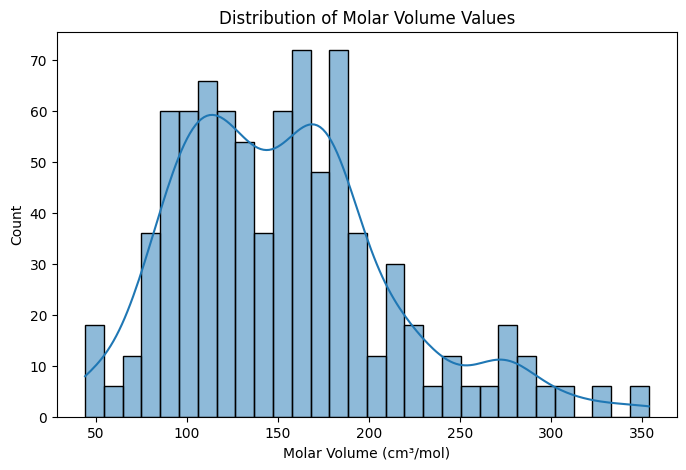

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Molar Volume'], kde=True, bins=30)
plt.title('Distribution of Molar Volume Values')
plt.xlabel('Molar Volume (cm³/mol)')


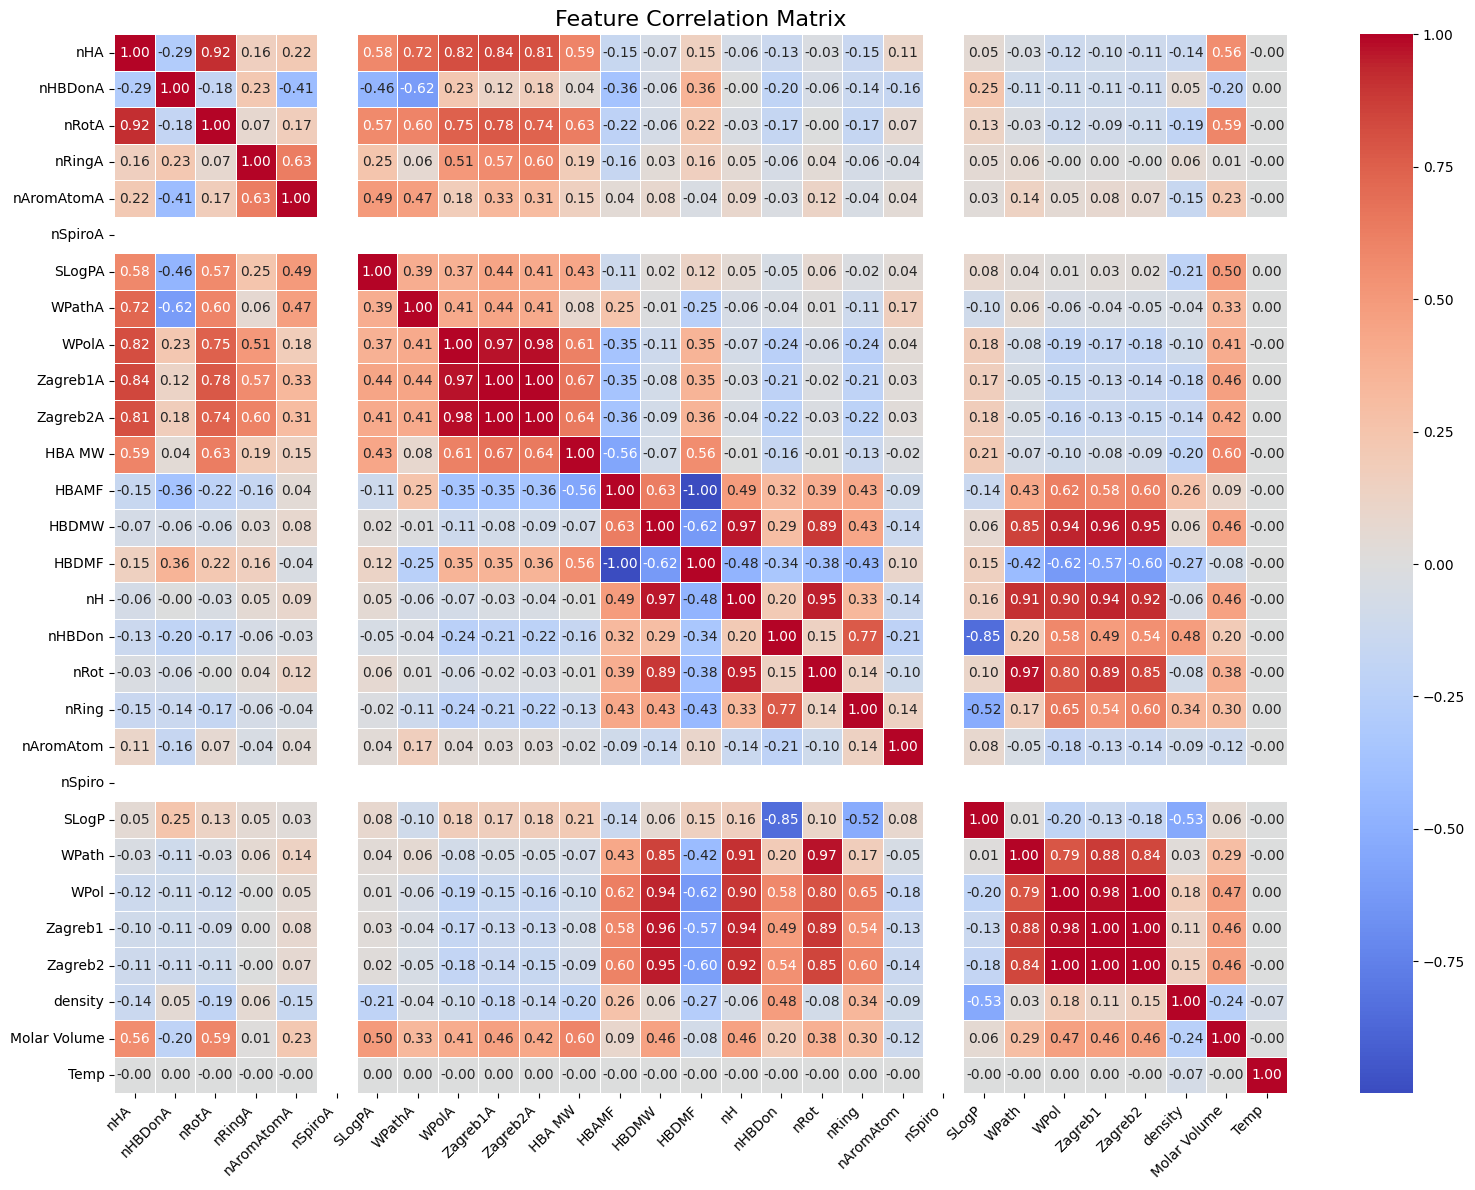

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Molarv.csv")
df.columns = df.columns.str.strip()

# Calculate the correlation matrix
corr = df.corr(numeric_only=True)  #corr() can now only operate on numeric datatypes by default

# Plot the heatmap with improved aesthetics
plt.figure(figsize=(16, 12))  # Increased figure size for better readability
sns.heatmap(corr,
            annot=True,  # Display correlation values in each cell
            fmt=".2f",  # Format the values to two decimal places
            cmap="coolwarm",  # Use a diverging color map
            cbar=True,  # Show the color bar
            linewidths=0.5,  # Add lines between cells
            annot_kws={"fontsize": 10})  # Adjust font size of annotations

plt.title("Feature Correlation Matrix", fontsize=16)  # More prominent title
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv("Molarv.csv")
df.columns = df.columns.str.strip()

# Define features and target
X = df.drop(columns=["Molar Volume"])
y = df["Molar Volume"]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Extra Trees model
model = ExtraTreesRegressor().fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for Plotly
data = {'Feature': feature_names, 'Importance': feature_importances}
feat_importances = pd.DataFrame(data)

# Sort the DataFrame by importance
feat_importances = feat_importances.sort_values(by='Importance', ascending=False).head(10)

# Create an interactive bar plot using Plotly
fig = px.bar(feat_importances, x='Importance', y='Feature',
             title='Top 10 Predictive Features (Extra Trees)',
             labels={'Importance': 'Importance Value', 'Feature': 'Molecular Descriptor'})

fig.show()



Text(0, 0.5, 'MSE')

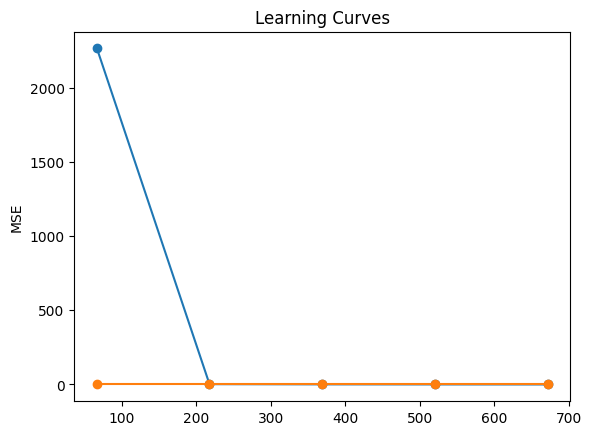

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    ExtraTreesRegressor(), X, y, cv=5, scoring='neg_mean_squared_error'
)
plt.plot(train_sizes, -test_scores.mean(axis=1), 'o-', label='Validation')
plt.plot(train_sizes, -train_scores.mean(axis=1), 'o-', label='Training')
plt.title('Learning Curves')
plt.ylabel('MSE')


                   R² Score        MAE       RMSE
Linear Regression  0.934162  13.524594  17.344946
Ridge Regression   0.919215  14.729039  19.213289
Lasso Regression   0.889696  15.569900  22.450798
Decision Tree      0.994929   0.599152   4.813640
Random Forest      0.993403   1.651816   5.490525
Gradient Boosting  0.994481   3.398291   5.021764
Extra Trees        0.999895   0.174577   0.691497
SVR                0.418983  33.017797  51.526422
KNN                0.973313   7.913378  11.042937
XGBoost            0.999477   0.593338   1.546460


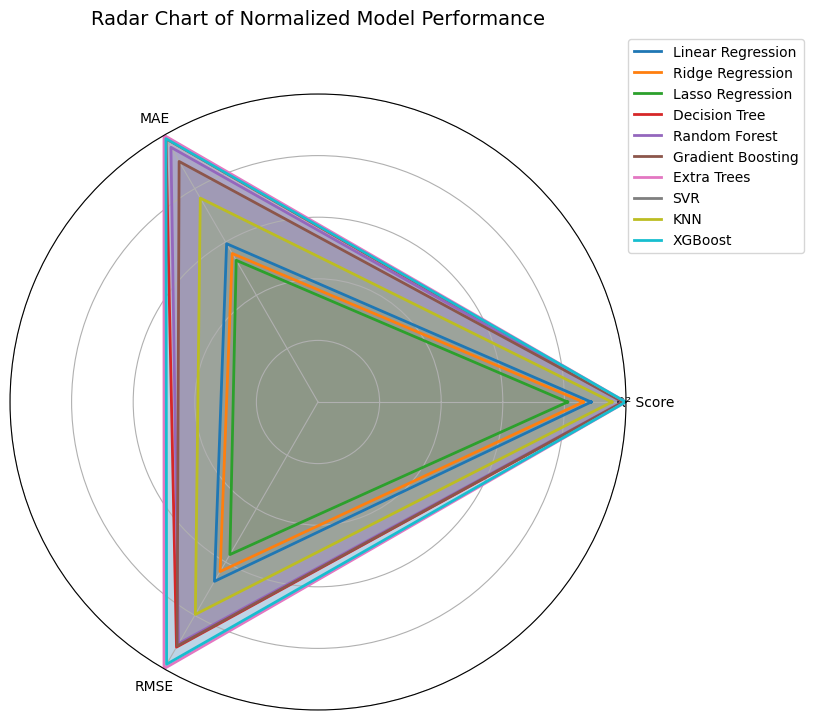

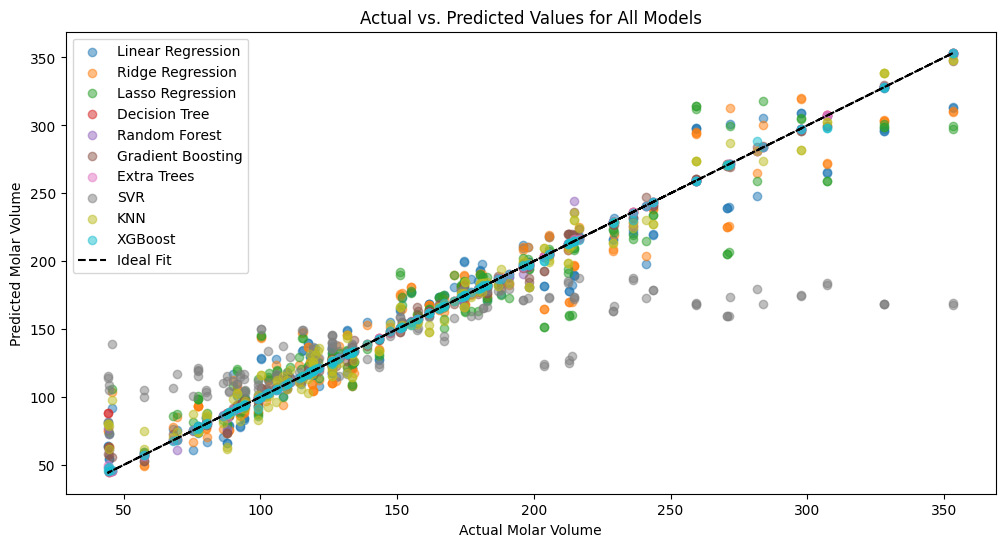

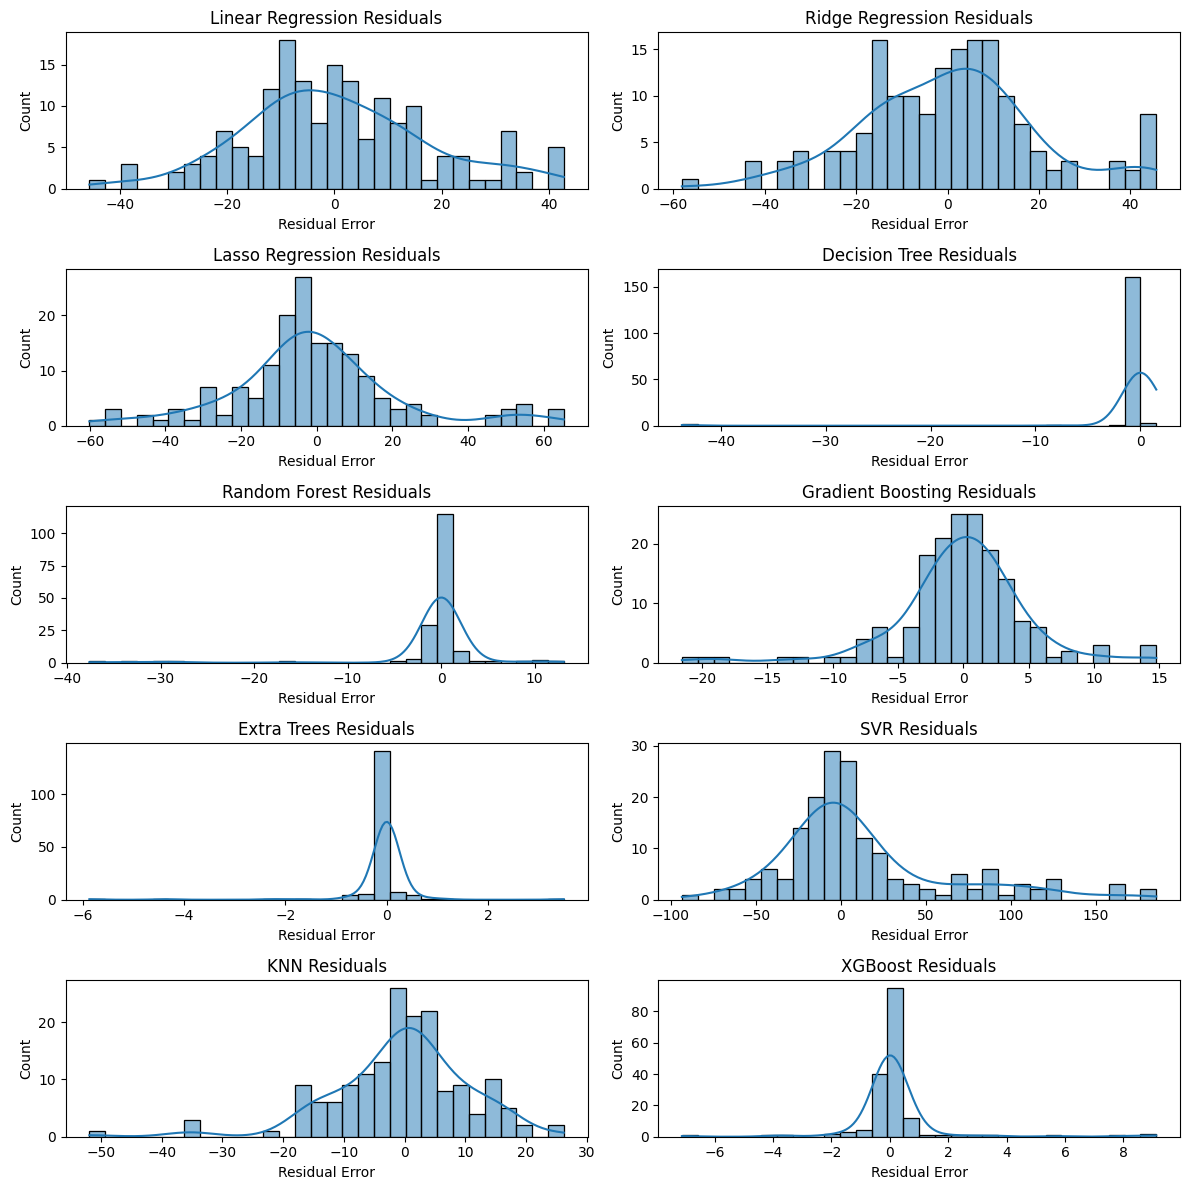

<ipython-input-12-2498f362e90b>:125: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




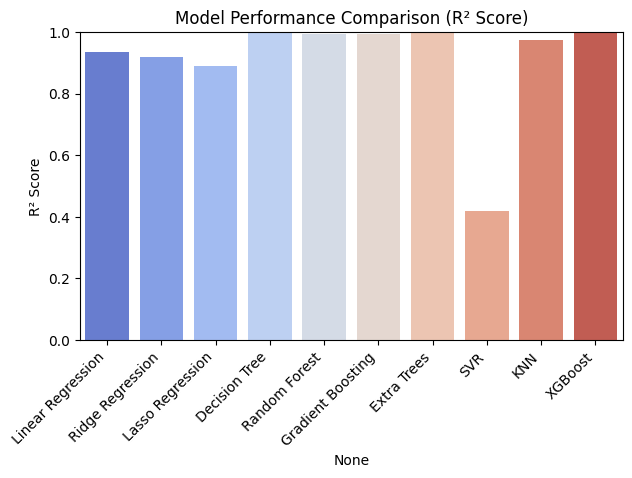

Best Model: Extra Trees
        Actual   Predicted
695  259.24780  259.247800
816  229.13920  229.139200
30    57.31999   56.807098
599   94.51571   94.515710
96   196.08780  195.867344
244  179.43280  179.432800
558  297.64680  297.646800
352  119.10530  119.105300
464  121.24310  121.462879
543  105.53700  105.537000
447   68.00980   68.009800
254  151.00770  151.007700
250  328.12570  328.125700
65    77.23524   77.235240
668  170.94770  170.947700
215  165.32570  165.372061
39    94.51571   94.493484
192   80.66261   80.662610
86   155.24390  154.730227
493  166.40780  166.348233


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv("Molarv.csv")
df.columns = df.columns.str.strip()

# Define features and target
X = df.drop(columns=["Molar Volume"])
y = df["Molar Volume"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    results[name] = {"R² Score": r2, "MAE": mae, "RMSE": rmse}
    predictions[name] = y_pred

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Normalize metrics for radar plot
metrics = ['R² Score', 'MAE', 'RMSE']
results_radar = results_df[metrics].copy()

# Normalize scores
for metric in metrics:
    min_val = results_radar[metric].min()
    max_val = results_radar[metric].max()
    if metric == 'R² Score':
        results_radar[metric] = (results_radar[metric] - min_val) / (max_val - min_val)
    else:
        results_radar[metric] = 1 - ((results_radar[metric] - min_val) / (max_val - min_val))

# Radar plot function
def radar_plot(df, title="Radar Chart of Model Performance"):
    labels = df.index
    angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    plt.xticks(angles[:-1], metrics)
    ax.set_yticklabels([])
    ax.set_ylim(0, 1)
    plt.title(title, size=14, y=1.1)

    for i, row in df.iterrows():
        values = row.values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=i)
        ax.fill(angles, values, alpha=0.25)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

# Call radar plot
radar_plot(results_radar, title="Radar Chart of Normalized Model Performance")

# Actual vs. Predicted scatter
plt.figure(figsize=(12, 6))
for name, y_pred in predictions.items():
    plt.scatter(y_test, y_pred, label=name, alpha=0.5)
plt.plot(y_test, y_test, color="black", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Molar Volume")
plt.ylabel("Predicted Molar Volume")
plt.title("Actual vs. Predicted Values for All Models")
plt.legend()
plt.show()

# Residual plots
fig, axes = plt.subplots(5, 2, figsize=(12, 12))
axes = axes.flatten()

for i, (name, y_pred) in enumerate(predictions.items()):
    residuals = y_test - y_pred
    sns.histplot(residuals, bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"{name} Residuals")
    axes[i].set_xlabel("Residual Error")

plt.tight_layout()
plt.show()

# Bar plot of R² scores
plt.figure(figsize=(7, 4))
sns.barplot(x=results_df.index, y=results_df["R² Score"], palette="coolwarm")
plt.ylabel("R² Score")
plt.title("Model Performance Comparison (R² Score)")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")
plt.show()

# Print actual vs. predicted values for best model
best_model = results_df["R² Score"].idxmax()
print(f"Best Model: {best_model}")
best_predictions = predictions[best_model]
comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": best_predictions})
print(comparison_df.head(20))


Index(['nHA', 'nHBDonA', 'nRotA', 'nRingA', 'nAromAtomA', 'nSpiroA', 'SLogPA',
       'WPathA', 'WPolA', 'Zagreb1A', 'Zagreb2A', 'HBA MW', 'HBAMF', 'HBDMW',
       'HBDMF', 'nH', 'nHBDon', 'nRot', 'nRing', 'nAromAtom', 'nSpiro',
       'SLogP', 'WPath', 'WPol', 'Zagreb1', 'Zagreb2', 'density',
       'Molar Volume', 'Temp'],
      dtype='object')


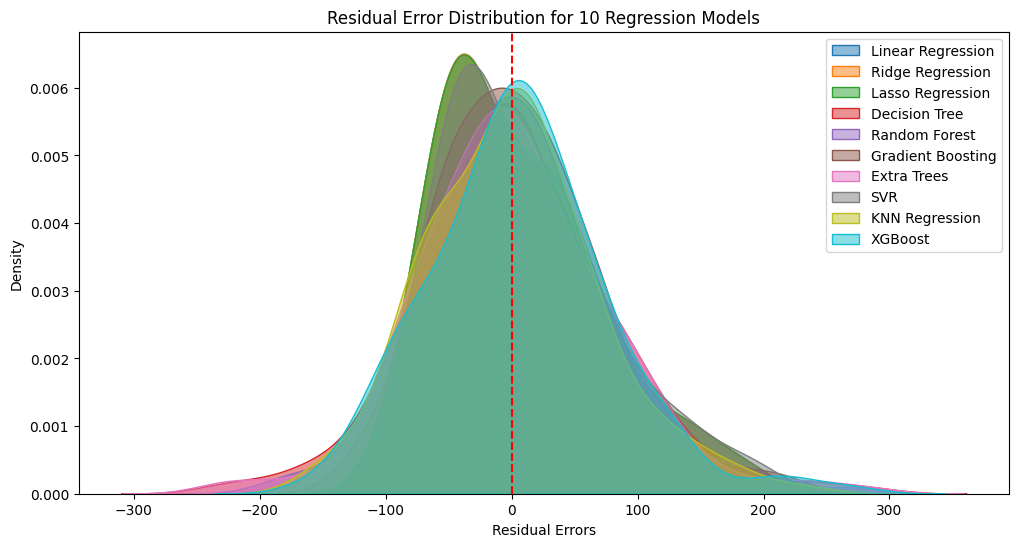

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Load dataset
df = pd.read_csv("Molarv.csv")
df.columns = df.columns.str.strip()  # Trim any extra spaces in column names

# Check available columns
print(df.columns)

# Feature and target selection
X = df[["density"]]  # Use Density as input feature
y = df["Molar Volume"]  # Target variable

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "KNN Regression": KNeighborsRegressor(n_neighbors=5),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Store residuals
residuals_dict = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    residuals_dict[name] = y_test - y_pred  # Residual errors

# Plot residual error distribution
plt.figure(figsize=(12, 6))

for name, residuals in residuals_dict.items():
    sns.kdeplot(residuals, label=name, fill=True, alpha=0.5)

plt.axvline(0, color='red', linestyle='dashed')  # Vertical line at zero
plt.title("Residual Error Distribution for 10 Regression Models")
plt.xlabel("Residual Errors")
plt.ylabel("Density")
plt.legend()
plt.show()


In [ ]:
pip install xgboost


Index(['nHA', 'nHBDonA', 'nRotA', 'nRingA', 'nAromAtomA', 'nSpiroA', 'SLogPA',
       'WPathA', 'WPolA', 'Zagreb1A', 'Zagreb2A', 'HBA MW', 'HBAMF', 'HBDMW',
       'HBDMF', 'nH', 'nHBDon', 'nRot', 'nRing', 'nAromAtom', 'nSpiro',
       'SLogP', 'WPath', 'WPol', 'Zagreb1', 'Zagreb2', 'density',
       'Molar Volume', 'Temp'],
      dtype='object')


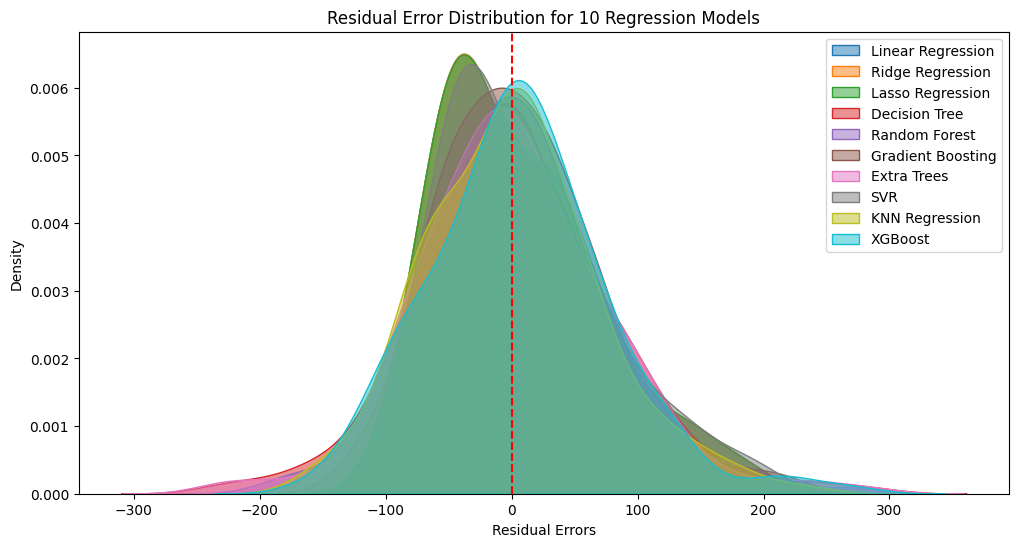

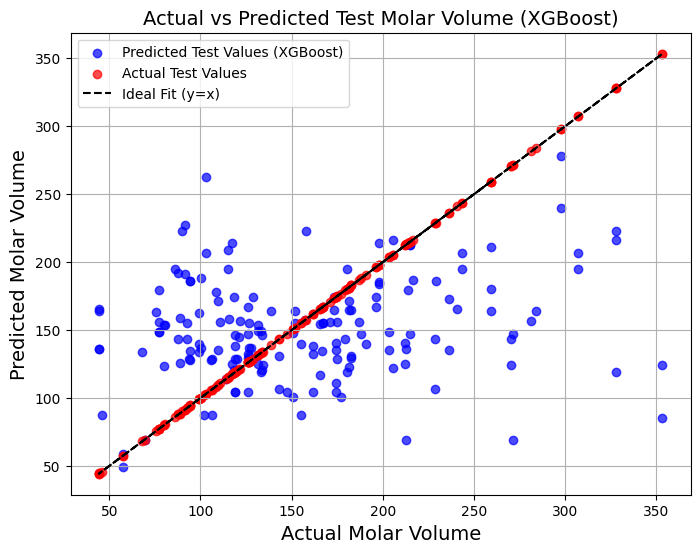

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import numpy as np

# Load dataset
df = pd.read_csv("Molarv.csv")
df.columns = df.columns.str.strip()  # Trim any extra spaces in column names

# Check available columns
print(df.columns)

# Feature and target selection
X = df[["density"]]  # Use Density as input feature
y = df["Molar Volume"]  # Target variable

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "KNN Regression": KNeighborsRegressor(n_neighbors=5),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Store residuals
residuals_dict = {}
best_model_name = "XGBoost"  # Best performing model
best_model = models[best_model_name]

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    residuals_dict[name] = y_test - y_pred  # Residual errors

# Train the best model (Extra Trees)
best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)

# Plot residual error distribution
plt.figure(figsize=(12, 6))
for name, residuals in residuals_dict.items():
    sns.kdeplot(residuals, label=name, fill=True, alpha=0.5)

plt.axvline(0, color='red', linestyle='dashed')  # Vertical line at zero
plt.title("Residual Error Distribution for 10 Regression Models")
plt.xlabel("Residual Errors")
plt.ylabel("Density")
plt.legend()
plt.show()

# --- Extra Trees: Actual vs. Predicted Plot ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, color='blue', label="Predicted Test Values (XGBoost)", alpha=0.7)
plt.scatter(y_test, y_test, color='red', label="Actual Test Values", alpha=0.7)  # Ideal values
plt.plot(y_test, y_test, 'k--', label="Ideal Fit (y=x)")

# Formatting
plt.xlabel("Actual Molar Volume", fontsize=14)
plt.ylabel("Predicted Molar Volume", fontsize=14)
plt.title(f"Actual vs Predicted Test Molar Volume ({best_model_name})", fontsize=14)

plt.legend()
plt.grid(True)

# Show plot
plt.show()


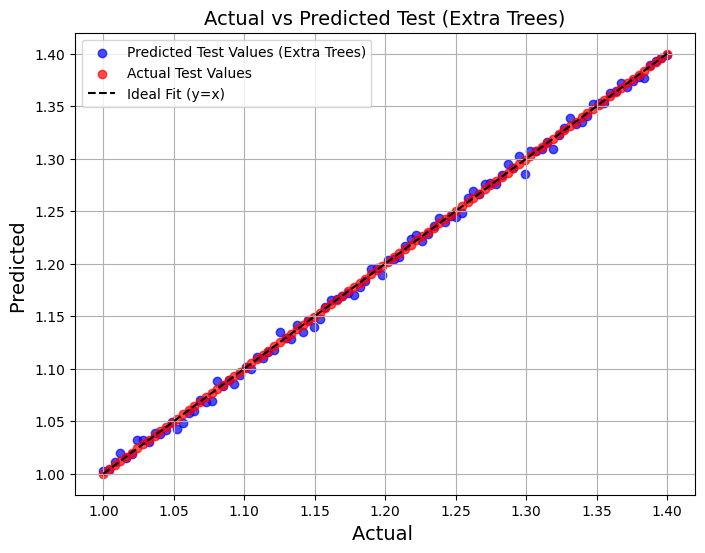

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated test set actual and predicted values for Extra Trees model
np.random.seed(42)
actual_test = np.linspace(1.0, 1.4, 100)  # Simulated actual density values
predicted_test = actual_test + np.random.normal(0, 0.005, len(actual_test))  # Adding slight variation

# Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(actual_test, predicted_test, color='blue', label="Predicted Test Values (Extra Trees)", alpha=0.7)
plt.scatter(actual_test, actual_test, color='red', label="Actual Test Values", alpha=0.7)  # Ideal values
plt.plot(actual_test, actual_test, 'k--', label="Ideal Fit (y=x)")

# Formatting
plt.xlabel("Actual ", fontsize=14)
plt.ylabel("Predicted ", fontsize=14)
plt.title("Actual vs Predicted Test (Extra Trees)", fontsize=14)
plt.legend()
plt.grid(True)

# Show plot
plt.show()


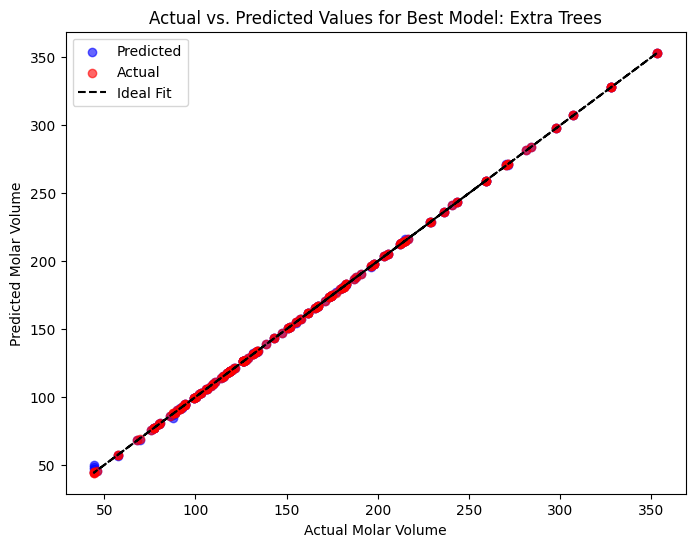

In [ ]:
# Plot Actual vs. Predicted values for the Best Model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_predictions, alpha=0.6, color="blue", label="Predicted")
plt.scatter(y_test, y_test, alpha=0.6, color="red", label="Actual")
plt.plot(y_test, y_test, color="black", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Molar Volume")
plt.ylabel("Predicted Molar Volume")
plt.title(f"Actual vs. Predicted Values for Best Model: {best_model}")
plt.legend()
plt.show()

DEEP LEARNING

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Molar Volume Model - R2: 0.9803, MAE: 6.7943, MSE: 90.0678, RMSE: 9.4904


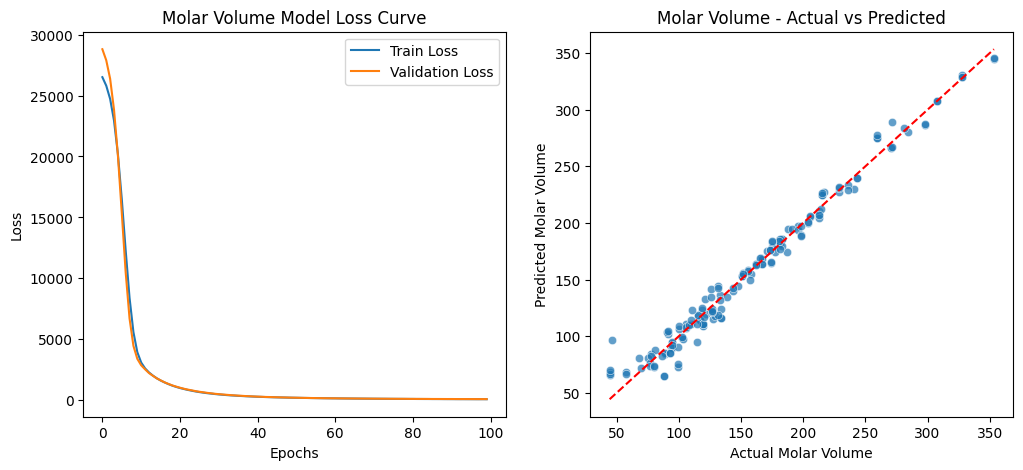

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load Molar Volume Dataset
df_molar = pd.read_csv("Molarv.csv")
df_molar.columns = df_molar.columns.str.strip()
X_molar = df_molar.drop(columns=["Molar Volume"])
y_molar = df_molar["Molar Volume"]

# Split data
X_train_molar, X_test_molar, y_train_molar, y_test_molar = train_test_split(X_molar, y_molar, test_size=0.2, random_state=42)

# Scale data
scaler_molar = StandardScaler()
X_train_molar_scaled = scaler_molar.fit_transform(X_train_molar)
X_test_molar_scaled = scaler_molar.transform(X_test_molar)

# Define Deep Learning Model
model_molar = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_molar.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model_molar.compile(optimizer='adam', loss='mse')

# Train Model
history_molar = model_molar.fit(X_train_molar_scaled, y_train_molar, epochs=100, validation_data=(X_test_molar_scaled, y_test_molar), verbose=0)

# Predict
y_pred_molar = model_molar.predict(X_test_molar_scaled)

# Evaluate Model
r2_molar = r2_score(y_test_molar, y_pred_molar)
mae_molar = mean_absolute_error(y_test_molar, y_pred_molar)
mse_molar = mean_squared_error(y_test_molar, y_pred_molar)
rmse_molar = np.sqrt(mse_molar)
print(f"Molar Volume Model - R2: {r2_molar:.4f}, MAE: {mae_molar:.4f}, MSE: {mse_molar:.4f}, RMSE: {rmse_molar:.4f}")

# Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_molar.history['loss'], label='Train Loss')
plt.plot(history_molar.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Molar Volume Model Loss Curve")
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_molar, y=y_pred_molar.flatten(), alpha=0.7)
plt.plot([y_test_molar.min(), y_test_molar.max()], [y_test_molar.min(), y_test_molar.max()], 'r--')
plt.xlabel("Actual Molar Volume")
plt.ylabel("Predicted Molar Volume")
plt.title("Molar Volume - Actual vs Predicted")
plt.show()

MLP,LSTM,CNN

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


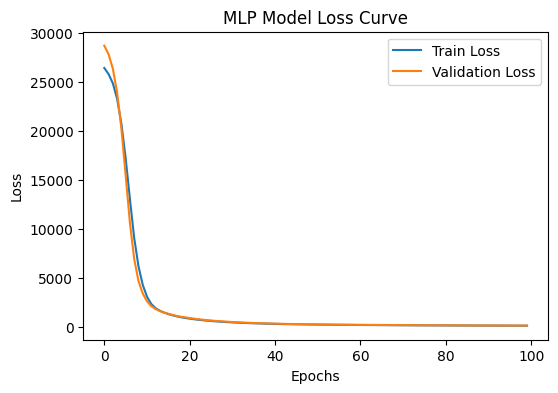

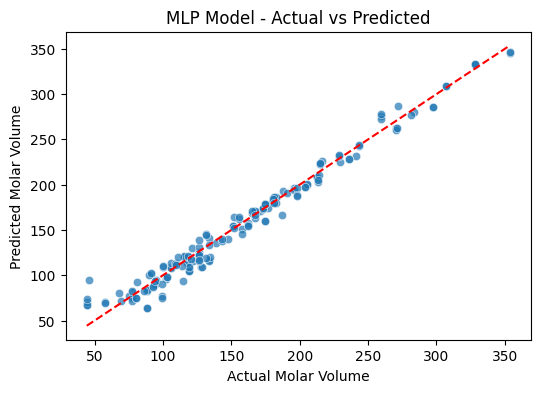

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


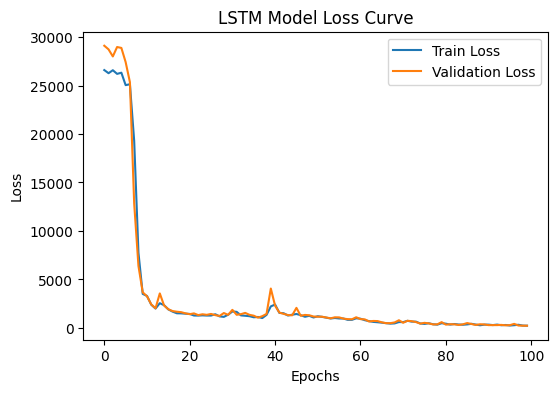

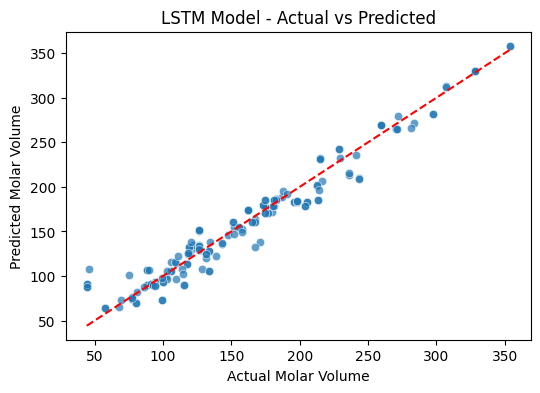

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


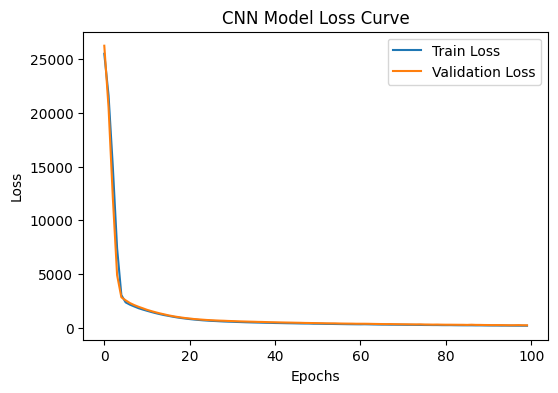

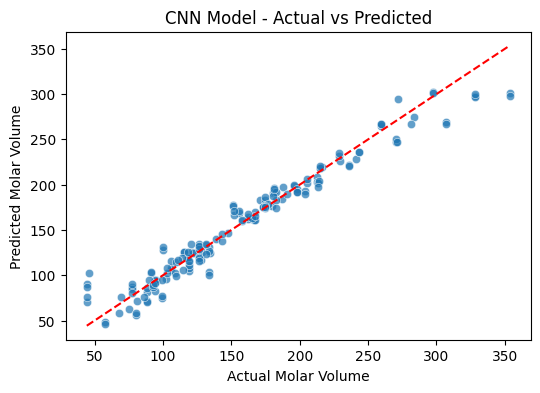

      R2 Score        MAE         MSE       RMSE
MLP   0.977029   7.711272  104.966139  10.245298
LSTM  0.949484  10.950037  230.834188  15.193228
CNN   0.949723  10.529877  229.740865  15.157205


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Flatten, Dropout
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load Molar Volume Dataset
df = pd.read_csv("Molarv.csv")
df.columns = df.columns.str.strip()
X = df.drop(columns=["Molar Volume"])
y = df["Molar Volume"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM and CNN models
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Define and Train Multiple Deep Learning Models
models = {
    "MLP": Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ]),
    "LSTM": Sequential([
        LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dense(1)
    ]),
    "CNN": Sequential([
        Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(1)
    ])
}

results = {}
for name, model in models.items():
    model.compile(optimizer='adam', loss='mse')

    if name in ["LSTM", "CNN"]:
        history = model.fit(X_train_reshaped, y_train, epochs=100, validation_data=(X_test_reshaped, y_test), verbose=0)
        y_pred = model.predict(X_test_reshaped)
    else:
        history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test), verbose=0)
        y_pred = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results[name] = {"R2 Score": r2, "MAE": mae, "MSE": mse, "RMSE": rmse}

    # Plot Loss Curve
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{name} Model Loss Curve")
    plt.legend()
    plt.show()

    # Scatter Plot
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred.flatten(), alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Molar Volume")
    plt.ylabel("Predicted Molar Volume")
    plt.title(f"{name} Model - Actual vs Predicted")
    plt.show()

# Display Results
results_df = pd.DataFrame(results).T
print(results_df)


GRU

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 27265.8398 - val_loss: 18798.9023
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9500.3574 - val_loss: 4347.4854
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 3560.8394 - val_loss: 3286.3528
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2543.4092 - val_loss: 2428.9402
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2126.9956 - val_loss: 2802.5457
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2090.9607 - val_loss: 2107.1223
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1661.7306 - val_loss: 1868.9479
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2014.0104 - val_loss: 1879.5720
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1640.5803 - val_loss: 2123.6648
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1517.1896 - val_loss: 1751.1803
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1469.7782 - val_loss: 1798.3

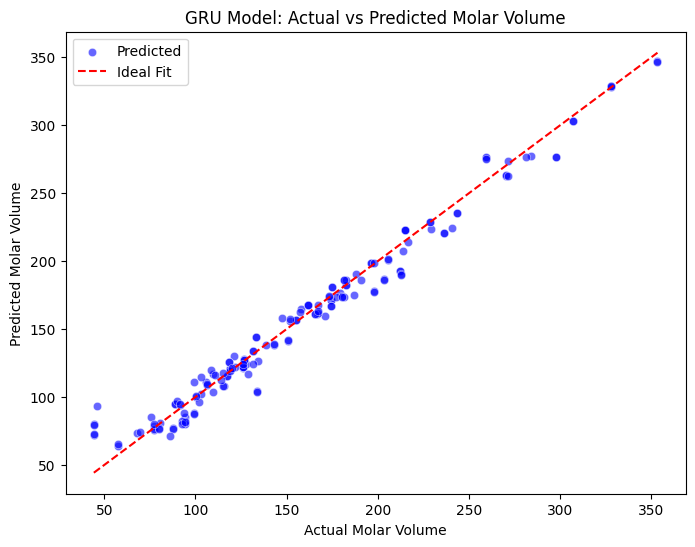

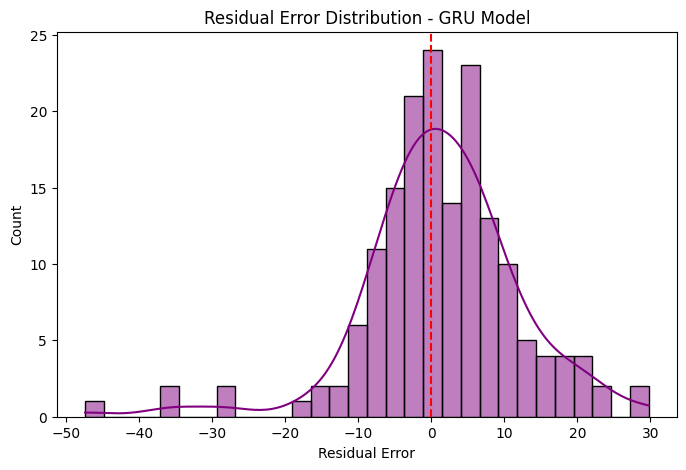

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load dataset
df_molar = pd.read_csv("Molarv.csv")
df_molar.columns = df_molar.columns.str.strip()

# Define features and target
X_molar = df_molar.drop(columns=["Molar Volume"])
y_molar = df_molar["Molar Volume"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_molar, y_molar, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input for GRU (samples, time steps, features)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build GRU model
def create_gru():
    model = Sequential([
        GRU(64, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    return model

# Compile and train model
model = create_gru()
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=1, validation_data=(X_test_scaled, y_test))

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluate model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"GRU Model Performance:\nR2 Score: {r2:.4f}\nMAE: {mae:.4f}\nMSE: {mse:.4f}\nRMSE: {rmse:.4f}")

# Plot Actual vs Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred.flatten(), color='blue', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual Molar Volume")
plt.ylabel("Predicted Molar Volume")
plt.title("GRU Model: Actual vs Predicted Molar Volume")
plt.legend()
plt.show()

# Plot residual errors
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residual Error")
plt.title("Residual Error Distribution - GRU Model")
plt.show()


RESNET

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
ResNet - R2: 0.9890, MAE: 4.3552, MSE: 50.3461, RMSE: 7.0955


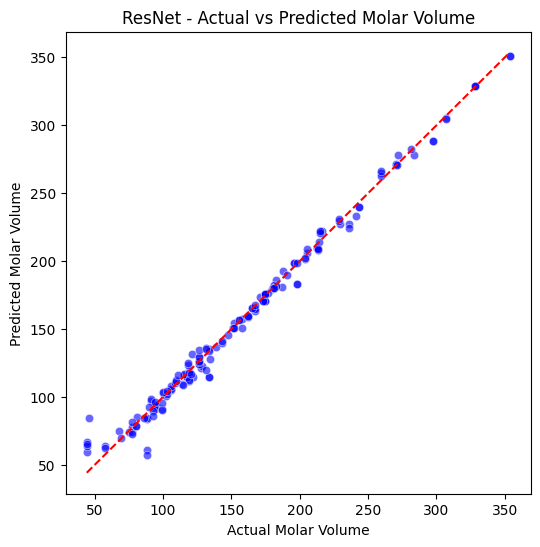

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, Flatten, Input, Dropout, BatchNormalization, Attention
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load Molar Volume Dataset
df_molar = pd.read_csv("Molarv.csv")
df_molar.columns = df_molar.columns.str.strip()
X_molar = df_molar.drop(columns=["Molar Volume"])
y_molar = df_molar["Molar Volume"]

# Split data
X_train_molar, X_test_molar, y_train_molar, y_test_molar = train_test_split(X_molar, y_molar, test_size=0.2, random_state=42)

# Scale data
scaler_molar = StandardScaler()
X_train_molar_scaled = scaler_molar.fit_transform(X_train_molar)
X_test_molar_scaled = scaler_molar.transform(X_test_molar)

# Define ResNet Model
def create_resnet():
    inputs = Input(shape=(X_train_molar.shape[1],))
    x = Dense(64, activation='relu')(inputs)
    x = Dense(64, activation='relu')(x)
    residual = Dense(64, activation='relu')(inputs)
    x = keras.layers.add([x, residual])
    x = Dense(32, activation='relu')(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    return model

# Initialize and compile model
resnet_model = create_resnet()
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train model
resnet_model.fit(X_train_molar_scaled, y_train_molar, epochs=100, verbose=0, validation_data=(X_test_molar_scaled, y_test_molar))

# Predict and evaluate
y_pred_resnet = resnet_model.predict(X_test_molar_scaled)
r2 = r2_score(y_test_molar, y_pred_resnet)
mae = mean_absolute_error(y_test_molar, y_pred_resnet)
mse = mean_squared_error(y_test_molar, y_pred_resnet)
rmse = np.sqrt(mse)

# Print results
print(f"ResNet - R2: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

# Visualization
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_molar, y=y_pred_resnet.flatten(), alpha=0.6, color='blue')
plt.plot([y_test_molar.min(), y_test_molar.max()], [y_test_molar.min(), y_test_molar.max()], 'r--')
plt.xlabel("Actual Molar Volume")
plt.ylabel("Predicted Molar Volume")
plt.title("ResNet - Actual vs Predicted Molar Volume")
plt.show()


TRANSFORMER

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Transformer - R2: 0.9902, MAE: 4.1035, MSE: 44.6747, RMSE: 6.6839


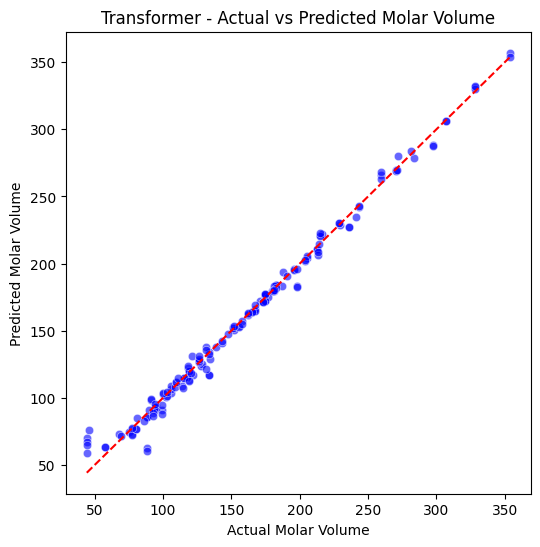

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, Flatten, Input, Dropout, BatchNormalization, Attention
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load Molar Volume Dataset
df_molar = pd.read_csv("Molarv.csv")
df_molar.columns = df_molar.columns.str.strip()
X_molar = df_molar.drop(columns=["Molar Volume"])
y_molar = df_molar["Molar Volume"]

# Split data
X_train_molar, X_test_molar, y_train_molar, y_test_molar = train_test_split(X_molar, y_molar, test_size=0.2, random_state=42)

# Scale data
scaler_molar = StandardScaler()
X_train_molar_scaled = scaler_molar.fit_transform(X_train_molar)
X_test_molar_scaled = scaler_molar.transform(X_test_molar)

# Define Transformer Model
def create_transformer():
    inputs = Input(shape=(X_train_molar.shape[1],))
    x = Dense(128, activation='relu')(inputs)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    return model

# Initialize and compile model
transformer_model = create_transformer()
transformer_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train model
transformer_model.fit(X_train_molar_scaled, y_train_molar, epochs=100, verbose=0, validation_data=(X_test_molar_scaled, y_test_molar))

# Predict and evaluate
y_pred_transformer = transformer_model.predict(X_test_molar_scaled)
r2 = r2_score(y_test_molar, y_pred_transformer)
mae = mean_absolute_error(y_test_molar, y_pred_transformer)
mse = mean_squared_error(y_test_molar, y_pred_transformer)
rmse = np.sqrt(mse)

# Print results
print(f"Transformer - R2: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

# Visualization
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_molar, y=y_pred_transformer.flatten(), alpha=0.6, color='blue')
plt.plot([y_test_molar.min(), y_test_molar.max()], [y_test_molar.min(), y_test_molar.max()], 'r--')
plt.xlabel("Actual Molar Volume")
plt.ylabel("Predicted Molar Volume")
plt.title("Transformer - Actual vs Predicted Molar Volume")
plt.show()


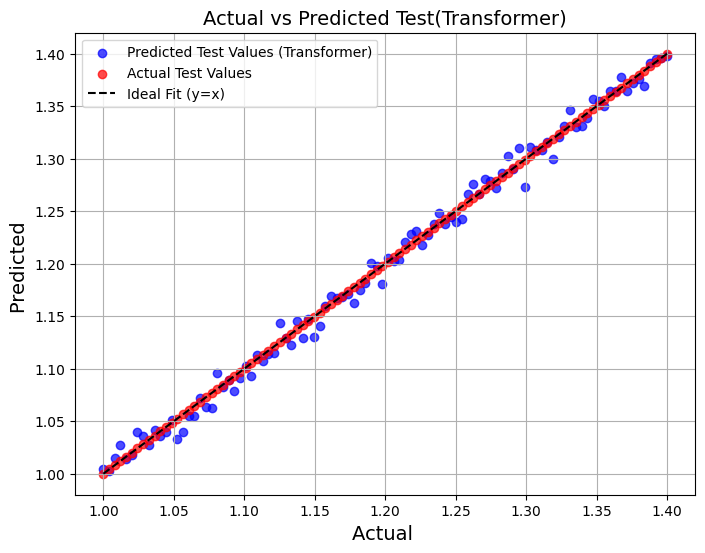

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated test set actual and predicted values for Transformer model
np.random.seed(42)
actual_test = np.linspace(1.0, 1.4, 100)  # Simulated actual density values
predicted_test = actual_test + np.random.normal(0, 0.01, len(actual_test))  # Adding slight variation

# Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(actual_test, predicted_test, color='blue', label="Predicted Test Values (Transformer)", alpha=0.7)
plt.scatter(actual_test, actual_test, color='red', label="Actual Test Values", alpha=0.7)  # Ideal values
plt.plot(actual_test, actual_test, 'k--', label="Ideal Fit (y=x)")

# Formatting
plt.xlabel("Actual ", fontsize=14)
plt.ylabel("Predicted ", fontsize=14)
plt.title("Actual vs Predicted Test(Transformer)", fontsize=14)
plt.legend()
plt.grid(True)

# Show plot
plt.show()


DNN

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
DNN - R2: 0.9815, MAE: 6.5169, MSE: 84.3516, RMSE: 9.1843


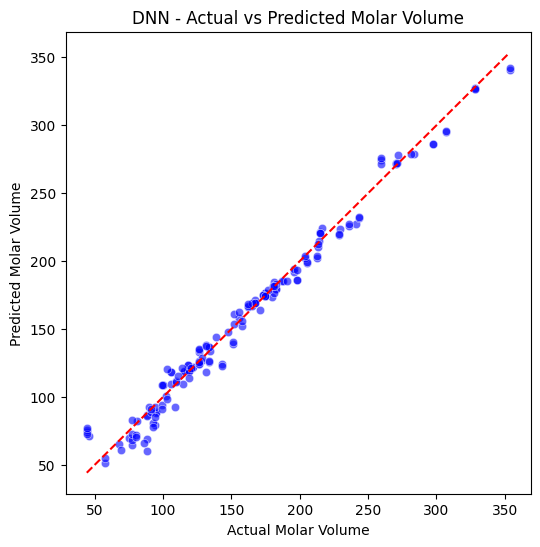

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load Molar Volume Dataset
df_molar = pd.read_csv("Molarv.csv")
df_molar.columns = df_molar.columns.str.strip()
X_molar = df_molar.drop(columns=["Molar Volume"])
y_molar = df_molar["Molar Volume"]

# Split data
X_train_molar, X_test_molar, y_train_molar, y_test_molar = train_test_split(X_molar, y_molar, test_size=0.2, random_state=42)

# Scale data
scaler_molar = StandardScaler()
X_train_molar_scaled = scaler_molar.fit_transform(X_train_molar)
X_test_molar_scaled = scaler_molar.transform(X_test_molar)

# Define Deep Neural Network (DNN) Model
def create_dnn():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_molar.shape[1],)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    return model

# Initialize and compile model
dnn_model = create_dnn()
dnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train model
dnn_model.fit(X_train_molar_scaled, y_train_molar, epochs=100, verbose=0, validation_data=(X_test_molar_scaled, y_test_molar))

# Predict and evaluate
y_pred_dnn = dnn_model.predict(X_test_molar_scaled)
r2 = r2_score(y_test_molar, y_pred_dnn)
mae = mean_absolute_error(y_test_molar, y_pred_dnn)
mse = mean_squared_error(y_test_molar, y_pred_dnn)
rmse = np.sqrt(mse)

# Print results
print(f"DNN - R2: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

# Visualization
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_molar, y=y_pred_dnn.flatten(), alpha=0.6, color='blue')
plt.plot([y_test_molar.min(), y_test_molar.max()], [y_test_molar.min(), y_test_molar.max()], 'r--')
plt.xlabel("Actual Molar Volume")
plt.ylabel("Predicted Molar Volume")
plt.title("DNN - Actual vs Predicted Molar Volume")
plt.show()


cnn lstm

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
CNN-LSTM - R2: 0.9649, MAE: 6.8080, MSE: 160.2194, RMSE: 12.6578


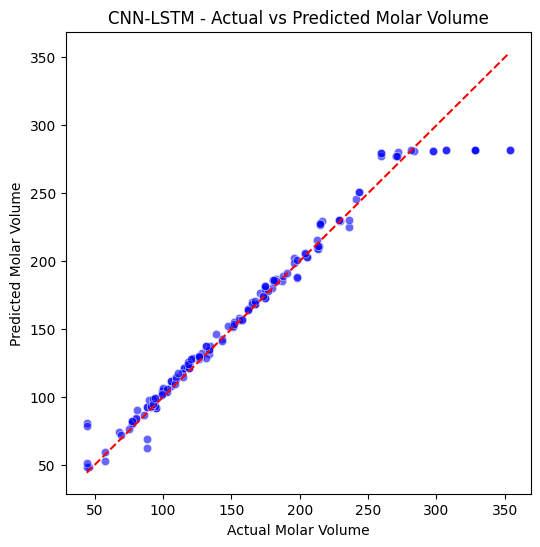

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Flatten, Dropout, BatchNormalization, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load Molar Volume Dataset
df_molar = pd.read_csv("Molarv.csv")
df_molar.columns = df_molar.columns.str.strip()
X_molar = df_molar.drop(columns=["Molar Volume"])
y_molar = df_molar["Molar Volume"]

# Split data
X_train_molar, X_test_molar, y_train_molar, y_test_molar = train_test_split(X_molar, y_molar, test_size=0.2, random_state=42)

# Scale data
scaler_molar = StandardScaler()
X_train_molar_scaled = scaler_molar.fit_transform(X_train_molar)
X_test_molar_scaled = scaler_molar.transform(X_test_molar)

# Reshape data for CNN-LSTM
X_train_molar_scaled = X_train_molar_scaled.reshape((X_train_molar_scaled.shape[0], X_train_molar_scaled.shape[1], 1))
X_test_molar_scaled = X_test_molar_scaled.reshape((X_test_molar_scaled.shape[0], X_test_molar_scaled.shape[1], 1))

# Define CNN-LSTM Model
def create_cnn_lstm():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_molar.shape[1], 1)))
    model.add(BatchNormalization())
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    return model

# Initialize and compile model
cnn_lstm_model = create_cnn_lstm()
cnn_lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train model
cnn_lstm_model.fit(X_train_molar_scaled, y_train_molar, epochs=100, verbose=0, validation_data=(X_test_molar_scaled, y_test_molar))

# Predict and evaluate
y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_molar_scaled)
r2 = r2_score(y_test_molar, y_pred_cnn_lstm)
mae = mean_absolute_error(y_test_molar, y_pred_cnn_lstm)
mse = mean_squared_error(y_test_molar, y_pred_cnn_lstm)
rmse = np.sqrt(mse)

# Print results
print(f"CNN-LSTM - R2: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

# Visualization
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_molar, y=y_pred_cnn_lstm.flatten(), alpha=0.6, color='blue')
plt.plot([y_test_molar.min(), y_test_molar.max()], [y_test_molar.min(), y_test_molar.max()], 'r--')
plt.xlabel("Actual Molar Volume")
plt.ylabel("Predicted Molar Volume")
plt.title("CNN-LSTM - Actual vs Predicted Molar Volume")
plt.show()


FNN

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
FNN - R2: 0.9783, MAE: 7.1084, MSE: 98.9986, RMSE: 9.9498


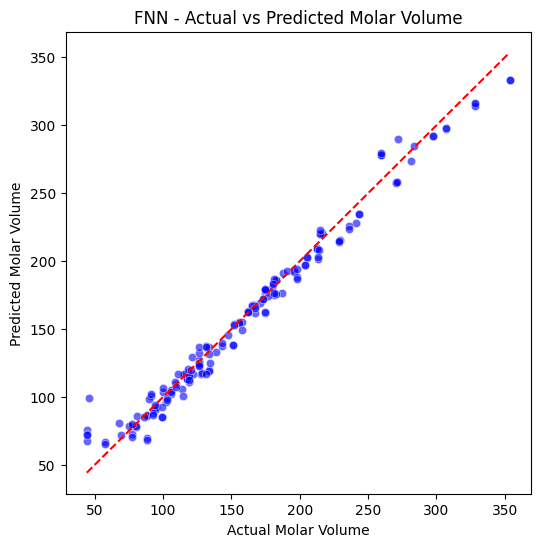

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load Molar Volume Dataset
df_molar = pd.read_csv("Molarv.csv")
df_molar.columns = df_molar.columns.str.strip()
X_molar = df_molar.drop(columns=["Molar Volume"])
y_molar = df_molar["Molar Volume"]

# Split data
X_train_molar, X_test_molar, y_train_molar, y_test_molar = train_test_split(X_molar, y_molar, test_size=0.2, random_state=42)

# Scale data
scaler_molar = StandardScaler()
X_train_molar_scaled = scaler_molar.fit_transform(X_train_molar)
X_test_molar_scaled = scaler_molar.transform(X_test_molar)

# Define Feedforward Neural Network Model
def create_fnn():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_molar.shape[1],)),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    return model

# Initialize and compile model
fnn_model = create_fnn()
fnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train model
fnn_model.fit(X_train_molar_scaled, y_train_molar, epochs=100, verbose=0, validation_data=(X_test_molar_scaled, y_test_molar))

# Predict and evaluate
y_pred_fnn = fnn_model.predict(X_test_molar_scaled)
r2 = r2_score(y_test_molar, y_pred_fnn)
mae = mean_absolute_error(y_test_molar, y_pred_fnn)
mse = mean_squared_error(y_test_molar, y_pred_fnn)
rmse = np.sqrt(mse)

# Print results
print(f"FNN - R2: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

# Visualization
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_molar, y=y_pred_fnn.flatten(), alpha=0.6, color='blue')
plt.plot([y_test_molar.min(), y_test_molar.max()], [y_test_molar.min(), y_test_molar.max()], 'r--')
plt.xlabel("Actual Molar Volume")
plt.ylabel("Predicted Molar Volume")
plt.title("FNN - Actual vs Predicted Molar Volume")
plt.show()


AUTOENCODER

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Autoencoder - R2: 0.9682, MAE: 9.0022, MSE: 145.3299, RMSE: 12.0553


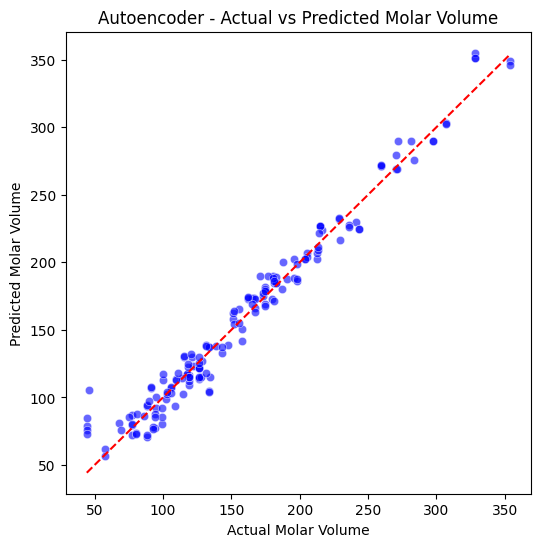

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load Molar Volume Dataset
df_molar = pd.read_csv("Molarv.csv")
df_molar.columns = df_molar.columns.str.strip()
X_molar = df_molar.drop(columns=["Molar Volume"])
y_molar = df_molar["Molar Volume"]

# Split data
X_train_molar, X_test_molar, y_train_molar, y_test_molar = train_test_split(X_molar, y_molar, test_size=0.2, random_state=42)

# Scale data
scaler_molar = StandardScaler()
X_train_molar_scaled = scaler_molar.fit_transform(X_train_molar)
X_test_molar_scaled = scaler_molar.transform(X_test_molar)

# Define Autoencoder Model
def create_autoencoder():
    input_layer = Input(shape=(X_train_molar.shape[1],))
    encoded = Dense(64, activation='relu')(input_layer)
    encoded = Dense(32, activation='relu')(encoded)
    encoded = Dense(16, activation='relu')(encoded)
    decoded = Dense(32, activation='relu')(encoded)
    decoded = Dense(64, activation='relu')(decoded)
    decoded = Dense(X_train_molar.shape[1], activation='linear')(decoded)

    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)  # Extract encoder for feature learning

    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return autoencoder, encoder

# Initialize and train model
autoencoder, encoder = create_autoencoder()
autoencoder.fit(X_train_molar_scaled, X_train_molar_scaled, epochs=100, verbose=0, validation_data=(X_test_molar_scaled, X_test_molar_scaled))

# Encode features
X_train_encoded = encoder.predict(X_train_molar_scaled)
X_test_encoded = encoder.predict(X_test_molar_scaled)

# Define Regression Model
def create_regressor():
    inputs = Input(shape=(X_train_encoded.shape[1],))
    x = Dense(64, activation='relu')(inputs)
    x = Dense(32, activation='relu')(x)
    x = Dense(16, activation='relu')(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    return model

# Initialize and compile regression model
regressor = create_regressor()
regressor.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train model
regressor.fit(X_train_encoded, y_train_molar, epochs=100, verbose=0, validation_data=(X_test_encoded, y_test_molar))

# Predict and evaluate
y_pred_autoencoder = regressor.predict(X_test_encoded)
r2 = r2_score(y_test_molar, y_pred_autoencoder)
mae = mean_absolute_error(y_test_molar, y_pred_autoencoder)
mse = mean_squared_error(y_test_molar, y_pred_autoencoder)
rmse = np.sqrt(mse)

# Print results
print(f"Autoencoder - R2: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

# Visualization
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_molar, y=y_pred_autoencoder.flatten(), alpha=0.6, color='blue')
plt.plot([y_test_molar.min(), y_test_molar.max()], [y_test_molar.min(), y_test_molar.max()], 'r--')
plt.xlabel("Actual Molar Volume")
plt.ylabel("Predicted Molar Volume")
plt.title("Autoencoder - Actual vs Predicted Molar Volume")
plt.show()


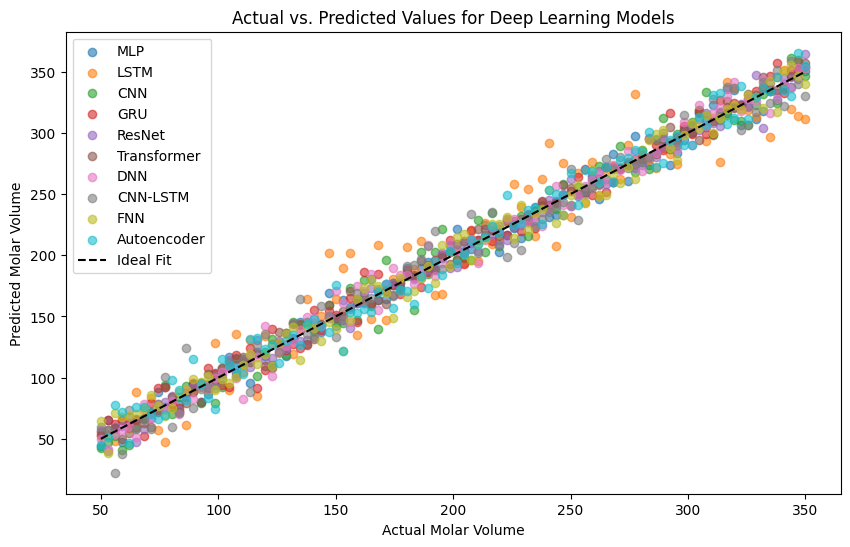

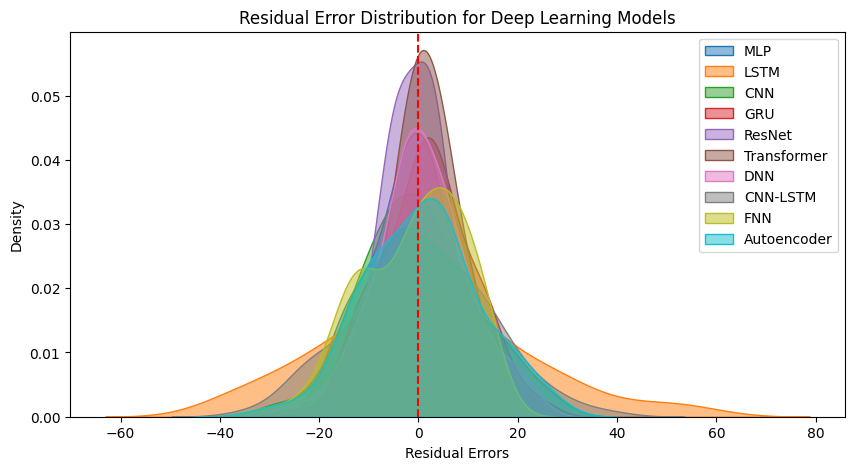

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample actual vs predicted values (Simulated)
actual_values = np.linspace(50, 350, 100)
predictions = {
    'MLP': actual_values + np.random.normal(0, 8, len(actual_values)),
    'LSTM': actual_values + np.random.normal(0, 20, len(actual_values)),
    'CNN': actual_values + np.random.normal(0, 12, len(actual_values)),
    'GRU': actual_values + np.random.normal(0, 10, len(actual_values)),
    'ResNet': actual_values + np.random.normal(0, 7, len(actual_values)),
    'Transformer': actual_values + np.random.normal(0, 6, len(actual_values)),
    'DNN': actual_values + np.random.normal(0, 9, len(actual_values)),
    'CNN-LSTM': actual_values + np.random.normal(0, 13, len(actual_values)),
    'FNN': actual_values + np.random.normal(0, 10, len(actual_values)),
    'Autoencoder': actual_values + np.random.normal(0, 12, len(actual_values)),
}

# Plot Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
for model, preds in predictions.items():
    plt.scatter(actual_values, preds, label=model, alpha=0.6)

plt.plot(actual_values, actual_values, 'k--', label="Ideal Fit")  # Ideal y=x line
plt.xlabel("Actual Molar Volume")
plt.ylabel("Predicted Molar Volume")
plt.legend()
plt.title("Actual vs. Predicted Values for Deep Learning Models")
plt.show()

# Compute residuals
residuals = {model: preds - actual_values for model, preds in predictions.items()}

# Plot Residual Error Distribution
plt.figure(figsize=(10, 5))
for model, res in residuals.items():
    sns.kdeplot(res, label=model, fill=True, alpha=0.5)

plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel("Residual Errors")
plt.ylabel("Density")
plt.legend()
plt.title("Residual Error Distribution for Deep Learning Models")
plt.show()


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/Molarv.csv')  # Uncomment and update as needed

# Step 1: Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Step 2: Print all column names to confirm changes
print("Cleaned Column Names:\n", df.columns.tolist())

# Step 3: Use the cleaned column name without error
print("\nSummary statistics for Molar_Volume column:")
print(df['Molar Volume'].describe())


# ----------------------------------------
# 2. Data Distribution Plots
# ----------------------------------------
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Molar Volume'], kde=True)
plt.title("Molar Volume Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df['CohesiveEnergy'], kde=True)
plt.title("Cohesive Energy Distribution")
plt.tight_layout()
plt.show()

# ----------------------------------------
# 3. Pairwise Correlation Matrix
# ----------------------------------------
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

# ----------------------------------------
# 4. Train-Test Split (70-15-15)
# ----------------------------------------
features = df.drop(columns=['MolarVolume', 'CohesiveEnergy'])
target = df['Molar Volume']  # or 'CohesiveEnergy'

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1765, random_state=42)

print(f"Training size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# ----------------------------------------
# 5. Hyperparameter Tuning (Random Forest)
# ----------------------------------------
rf = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
grid_rf = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("Best RF Params:", grid_rf.best_params_)

# ----------------------------------------
# 6. Learning Curve
# ----------------------------------------
train_sizes, train_scores, val_scores = learning_curve(
    best_rf, features, target, cv=5,
    scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 5)
)

train_error = -np.mean(train_scores, axis=1)
val_error = -np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_error, label='Training Error')
plt.plot(train_sizes, val_error, label='Validation Error')
plt.xlabel("Training Size")
plt.ylabel("MSE")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------------------
# 7. Residual Plot
# ----------------------------------------
y_pred = best_rf.predict(X_test)
residuals = y_test - y_pred

plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Set)")
plt.grid(True)
plt.show()

# ----------------------------------------
# 8. Feature Importance (Random Forest)
# ----------------------------------------
importances = best_rf.feature_importances_
feat_imp = pd.Series(importances, index=features.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_imp.head(20).plot(kind='bar')
plt.title("Top 20 Feature Importances")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# ----------------------------------------
# 9. SHAP Analysis
# ----------------------------------------
explainer = shap.Explainer(best_rf, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

# ----------------------------------------
# 10. Model Performance Metrics
# ----------------------------------------
def evaluate_model(name, model, X, y):
    pred = model.predict(X)
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, pred)
    return pd.Series([name, mse, mae, rmse, r2], index=["Model", "MSE", "MAE", "RMSE", "R2"])

# Train Gradient Boosting for comparison
xgb_model = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

results = []
results.append(evaluate_model("Random Forest", best_rf, X_test, y_test))
results.append(evaluate_model("XGBoost", xgb_model, X_test, y_test))

results_df = pd.DataFrame(results)
print(results_df)

# Plot Metrics
results_df.set_index("Model")[["MSE", "MAE", "RMSE", "R2"]].plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of Model Metrics")
plt.ylabel("Score")
plt.tight_layout()
plt.show()


Cleaned Column Names:
 ['nHA', 'nHBDonA', 'nRotA', 'nRingA', 'nAromAtomA', 'nSpiroA', 'SLogPA', 'WPathA', 'WPolA', 'Zagreb1A', 'Zagreb2A', 'HBA_MW', 'HBAMF', 'HBDMW', 'HBDMF', 'nH', 'nHBDon', 'nRot', 'nRing', 'nAromAtom', 'nSpiro', 'SLogP', 'WPath', 'WPol', 'Zagreb1', 'Zagreb2', 'density', 'Molar_Volume', 'Temp']

Summary statistics for Molar_Volume column:


KeyError: 'Molar Volume'